In [2]:
# Importing modules

import pandas as pd # for data wrangling
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
import missingno as msno # for visualizing missing values in data
import numpy as np # for array computations

plt.style.use('ggplot') # setting style for matplotlib

In [1]:
# Loading the data

train_df = pd.read_csv("train.zip", compression = 'zip')

NameError: name 'pd' is not defined

In [17]:
# First 10 data points

train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,dropoff_date,dropoff_day,trip_in_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,Monday,2016-03-14,Monday,7
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,Sunday,2016-06-12,Sunday,11
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,Tuesday,2016-01-19,Tuesday,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,Wednesday,2016-04-06,Wednesday,7
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,Saturday,2016-03-26,Saturday,7


In [ ]:
# Summary of dataset

train_df.describe()

In [ ]:
# Checking for missing values
# No missing values

msno.matrix(train_df)

In [3]:
'''This function can take in dropoff_datetime and pickup_datetime columns.It then extracts 
   two new columns out of each, for instance, pickup_date and pickup_day'''


def get_day_date(col_name):
    original_datetime = train_df[col_name]
    original_datetime.tolist()
    
    dates_only = []
    
    for each_datetime in original_datetime:
        dates_only.append(each_datetime[:10])
    
    src_dest, _ = col_name.split('_')
    
    train_df[src_dest + '_date'] = dates_only
    train_df[src_dest + '_date'] = pd.to_datetime(train_df[src_dest + '_date'])
    
    train_df[src_dest + '_day'] = train_df[src_dest + '_date'].dt.weekday_name
    

In [4]:
# Invoke the get_day_date function on pickup_datetime and dropoff_datetime columns

get_day_date('pickup_datetime')
get_day_date('dropoff_datetime')

In [5]:
# Adding a trip_duration in minutes column for clearer visualisations and understanding

train_df['trip_in_minutes'] = train_df['trip_duration']//60

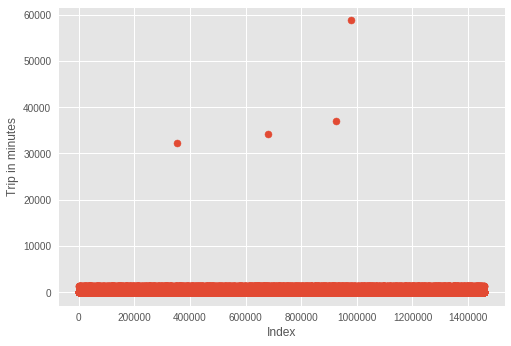

In [22]:
# Searching for outliers with respect to the target variable, i.e, trip duration
# 4 outliers

plt.scatter(train_df.index, train_df['trip_in_minutes'])
plt.xlabel("Index")
plt.ylabel("Trip in minutes")
plt.show()


In [31]:
# Examining outliers. Trips greater than a day!
# Removing those 4 outliers from train data

print(train_df[train_df['trip_in_minutes']>1440])
train_df = train_df[train_df['trip_in_minutes'] < 1440]

               id  vendor_id      pickup_datetime     dropoff_datetime  \
355003  id1864733          1  2016-01-05 00:19:42  2016-01-27 11:08:38   
680594  id0369307          1  2016-02-13 22:38:00  2016-03-08 15:57:38   
924150  id1325766          1  2016-01-05 06:14:15  2016-01-31 01:01:07   
978383  id0053347          1  2016-02-13 22:46:52  2016-03-25 18:18:14   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
355003                1        -73.789650        40.643559         -73.956810   
680594                2        -73.921677        40.735252         -73.984749   
924150                1        -73.983788        40.742325         -73.985489   
978383                1        -73.783905        40.648632         -73.978271   

        dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
355003         40.773087                  N        1939736  2016-01-05   
680594         40.759979                  N        2049578  2016-02-13   
9

In [61]:
'''This function saves the data sent in "dataframe" as "save_as.gz". It also runs sanity check
   to see if it was saved and loaded correctly. NEEDS WORK!'''

def save_dataframe(dataframe, save_as):
    dataframe.to_csv(save_as + ".gz", mode = 'w', compression='gzip', index = 'False', encoding='UTF-8')
    test_df = pd.read_csv(save_as + ".gz", compression='gzip', encoding='UTF-8')
    del test_df['Unnamed: 0']
    
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [62]:
# Saving this modified dataframe

save_dataframe(train_df, 'train_day_date_minutes')

Warning -- equivalence test!!! Double-check.
